# **İbrahim Erekmen** 

##**1806102040**

###**Regresyon Analizi**



#Tanım

##Amaç

Bu defterin hazırlamasındaki amaç, çeşitli regrosyon modelllerin tanımı, ev bilgilerinin olduğu veri setinin incelenmesi görselleştirilmesi, çeşitli Regresyon Modellerinin bu veri seti üzerinde eğitilmesi, ve rmse hatasının hesaplanması ayrıca bazı ev fiyatlarının tahimlemesi şeklindedir.

##Doğrusal Regresyon Tanım

Temsil, belirli bir girdi değerleri (x) kümesini, bu girdi değerleri (y) kümesi için tahmin edilen çıktı olan çözümü birleştiren doğrusal bir denklemdir. Bu nedenle, hem giriş değerleri (x) hem de çıkış değeri sayısaldır

Doğrusal denklem, her girdi değerine veya sütuna, katsayı adı verilen ve büyük Yunanca Beta (B) harfiyle gösterilen bir ölçek faktörü atar. Çizgiye ek bir serbestlik derecesi veren (örneğin iki boyutlu bir çizimde yukarı ve aşağı hareket etme) ek bir katsayı da eklenir ve genellikle kesişme veya sapma katsayısı olarak adlandırılır.

Örneğin, basit bir regresyon probleminde (tek bir x ve bir tek y), modelin formu şöyle olacaktır:

**y = B0 + B1*x**

Daha yüksek boyutlarda, birden fazla girdiye (x) sahip olduğumuzda, çizgiye düzlem veya hiper-düzlem denir. Bu nedenle temsil, denklemin şekli ve katsayılar için kullanılan spesifik değerlerdir (örneğin, yukarıdaki örnekte B0 ve B1).

## Polinomal Regresyon Tanım

Polinom Regresyon, bağımlı(y) ve bağımsız değişken(x) arasındaki ilişkiyi n'inci dereceden polinom olarak modelleyen bir regresyon algoritmasıdır. Polinom Regresyon denklemi aşağıda verilmiştir:

**y= b0+b1x1+ b2x12+ b2x13+...... bnx1n**

Neden polinomal regreyon?

Doğrusal bir veri kümesine doğrusal bir model uygularsak , Basit Doğrusal Regresyon'da gördüğümüz gibi bize iyi bir sonuç verir, ancak aynı modeli doğrusal olmayan bir veri kümesinde herhangi bir değişiklik yapmadan uygularsak , o zaman sert bir sonuç verir. çıktı. Hangi kayıp fonksiyonunun artacağından dolayı hata oranı yüksek olacak ve doğruluk düşecektir.
Dolayısıyla, veri noktalarının doğrusal olmayan bir şekilde düzenlendiği bu tür durumlar için Polinom Regresyon modeline ihtiyacımız var . Doğrusal veri kümesi ve doğrusal olmayan veri kümesinin aşağıdaki karşılaştırma şemasını kullanarak daha iyi anlayabiliriz.

#Veriseti inceleme ve görselleştirme

Bazı önemli kütüphanalerin içe aktarılması

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Verinin okunması

In [ ]:
df=pd.read_csv("home_data.csv")

Verinin ilk 5 satırı

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Verşye özgü bazı sayısal değerler

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Veride boş değer içieren bir kolon olup olmadığının kontrolü

In [ ]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Veriye ait korelasyon matrisinin çizdirilmesi

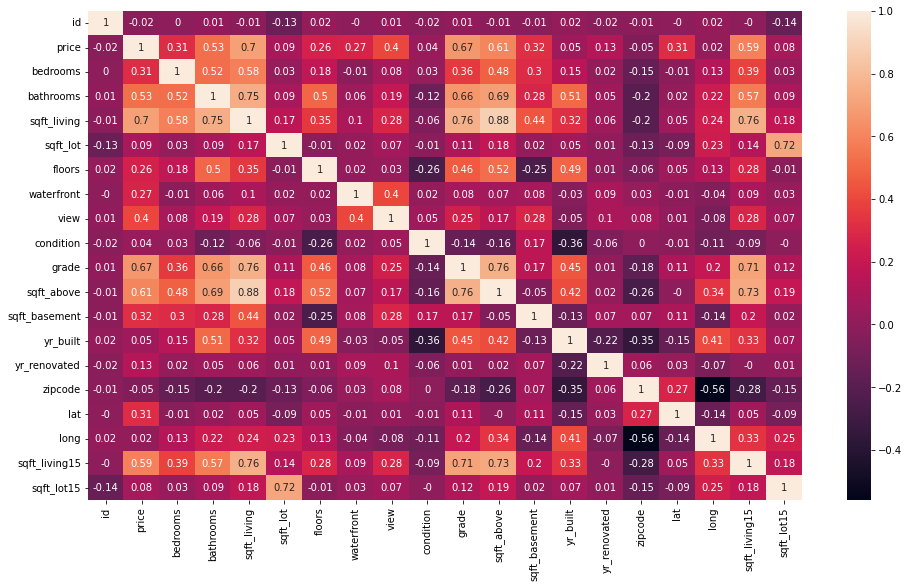

In [ ]:
corr=df.corr()
corr=round(corr,2)
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)
plt.show()

Posta koduna göre verinin dağılımı

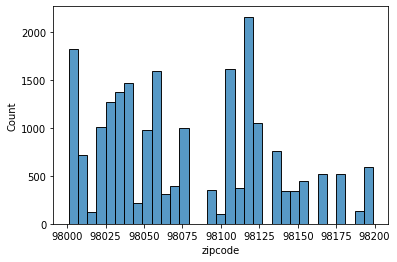

In [ ]:
sns.histplot(data=df['zipcode'])

Fiyat özelliğine göre verinin dağılımı

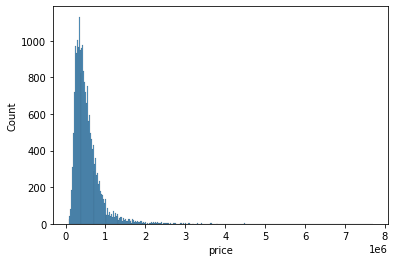

In [ ]:
sns.histplot(data=df['price'])

Posta kodu ve fiyat verislerinin dağılımı

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


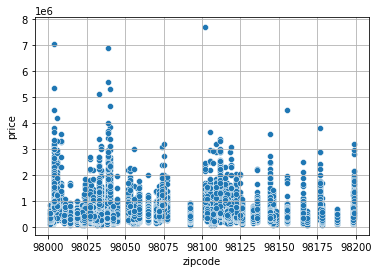

In [ ]:
sns.scatterplot(df['zipcode'],df['price'])
plt.grid()
plt.show()

Verideki en yüksek,en düşük ve oratalama ev satış fiyatları

In [ ]:
print("En yüksek ev satış fiyatı",df['price'].max())
print("En düşük ev satış fiyatı",df['price'].min())
print("Ortalama ev satış fiyatı",np.mean(df['price']))

7700000
75000
540088.1419053348


En yüksek ortalama satış fiyatına sahip bölge

In [ ]:
max=df[df['price']==df['price'].max()]
max

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


En yüksek satış fiyatına sahip bölge

In [ ]:
max['zipcode']

7252    98102
Name: zipcode, dtype: int64

En yüksek ev satış fiyatına sahip bölgedeki ortalama ev satış fiyatı

In [ ]:
zc=df[df['zipcode']==98102]
print("En yüksek ev satış fiyatına sahip bölgedeki ortalama ev satış fiyatı:",zc['price'].mean())

En yüksek ev satış fiyatına sahip bölgedeki ortalama ev satış fiyatı 901258.2380952381


Ev fiyatlarının filtelenmesi (2000 sqft den büyük ve 4000 sqft den küçük olanalar)

In [ ]:
high2k=df[df['sqft_living']>2000]#2000 sq feetden büyükler
filtered=high2k[high2k['sqft_living']<4000]#2000 sq feetden büyüklerin içindeki 4000'den küçükler
filtered

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
10,1736800520,20150403T000000,662500,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
22,7137970340,20140703T000000,285000,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21599,7202300110,20140915T000000,810000,4,3.00,3990,7838,2.0,0,0,3,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21603,7852140040,20140825T000000,507250,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,3448900210,20141014T000000,610685,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


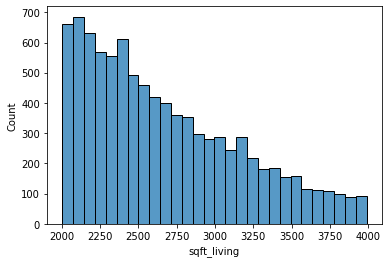

In [ ]:
sns.histplot(filtered['sqft_living'])

In [ ]:
#df.shape[0]=21613 %100 ise
#filtered.shape[0]=9111 %x'dir
x=(filtered.shape[0]*100)/df.shape[0]
print(x,"%")

42.155184379771434 %


#Lineer Regresyon

##Basit Doğrusal Regresyon Modeli

Bu bölümde sadece m2 bilgisiyle fiyat tahmin eden bir basit regresyon modeli  oluşturacağız.

Doğrusal regresyon modelinin oluşturulması

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Fiyat ve m2 kolonunun belirlenmesi

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Veriden m2 ve fiyat bilgisinin çekilmesi

In [ ]:
X = df.iloc[:,[5]].values#m2
y = df.iloc[:, [2]].values#fiyat

In [ ]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [ ]:
y

array([[221900],
       [538000],
       [180000],
       ...,
       [402101],
       [400000],
       [325000]])

X ve y değerleri arasında büyük fark var modelin düzgün çalışabilmesi için bu farkı standartlaştırmak gereklidir.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std=sc_X.fit_transform(y)

In [ ]:
X_std

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [ ]:
y_std

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

X ve y değerleri standart aralığa getirildi.

X ve y'nin eğitim ve test veri seti olarak bölünmesi

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=0)

Modelin X eğitim veri seitne uydurulması

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Modelin Tahmini

In [ ]:
y_pred = lr.predict(X_test)

RMSE Hatasının hesaplanması

In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.6779253130619914


Model Katsayılarının yazdırılması

In [ ]:
 #y=b0+b1x
 print('b0:', lr.intercept_)#b0
 print('b1:', lr.coef_)#b1

b0: [0.00621304]
b1: [[0.7104032]]


Modelin çizdirilmesi

Text(0.5, 1.0, 'Doğrusal Regresyon Modeli')

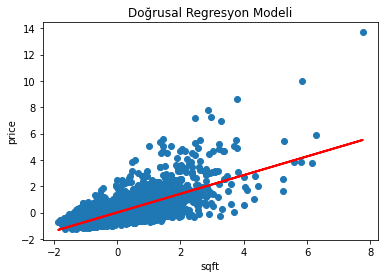

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,c='r',linewidth=2)
plt.xlabel("sqft")
plt.ylabel("price")
plt.title("Doğrusal Regresyon Modeli")

##Gelişmiş özellikler kullanan Doğrusal Regresyon Modeli 

Bu bölümde verideki tüm özellikleri kullanarak regresyon modeli  oluşturacağız.

Doğrusal Regresyon Modelinin Oluşturulması

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()

Veriyi tekrar okuyalım

In [ ]:
df=pd.read_csv("home_data.csv")

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

X değerleri id ,date ve price hariç bütün özelliklerden oluşacak. y değerleri ise fiyat bilgisi içeriyor

In [ ]:
X = df.iloc[:,3:].values# id ,date ve price hariç bütün özellikler
y = df.iloc[:, [2]].values#fiyat

X ve y değerleri standart bir aralığa çektim

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std=sc_X.fit_transform(y)

Eğitim ve test veri setinin ayrılması

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=0)

Eğitim veri kümesinin modele uydurulması

In [ ]:
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Modelin test veri seti üzerinde tahminlemesi

In [ ]:
y_pred = linReg.predict(X_test)

RMSE hatasının hesaplanması

In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.5188241623042399


###Sonuç

Basit Regresyon modelinde sadece m2 özelliğini kullanarak basit regresyon modelinde fiyat tahmini yaptım . Bu modelin RMSE hatası : 0.678 çıktmıştı. Şimdi ise verideki diğer özellekleri de kullanarak (yatak odası,banyo vb.) eğittiğim modelin RMSE hatası 0.5189 çıktı. Bu sonuç bize sadece m2 fiyatı ile ev tahmini yapmanın riskli olduğunu gösteriyor. Daha fazla özellik kullandığımızda hata azalmakta

#Polinomal Regresyon 

## Basit Polinomal regresyon (2.Derece)

Bu bölümde sadece m2 bilgisiyle fiyat tahmin eden bir 2. dereceden bir polinomal model oluşturdum.

Bazı önemli kütüphanelerin içe aktarılması

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Verinin okunması

In [ ]:
df = pd.read_csv('home_data.csv')

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Verideki sqft ve price kolonuna sayısal indeksle ulaşılması

In [ ]:
X = df.iloc[:,[5]].values
y = df.iloc[:, [2]].values

X ve y değerleri arasında çok büyük bir fark olduğu için bunları standart bir aralığa çekmemiz gerekiyor

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
y_std = sc_X.fit_transform(y)

Eğitim ve test veri setinin oluşturulması

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X_std, y_std, test_size=0.2, random_state = 0)

Test veri setindeki dağılım

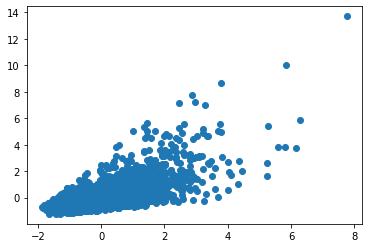

In [ ]:
plt.scatter(X_test,y_test)

Polinomal Regresyon Modelinin oluşturulması ve eğitim verisetine uydurulması

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly= poly_reg.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Test veri seti üzerinde tahminleme yapılması

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_polyt=poly_reg.fit_transform(X_test)
y_pred = lin_reg.predict(X_polyt)

Modelin görselleştirlmesi

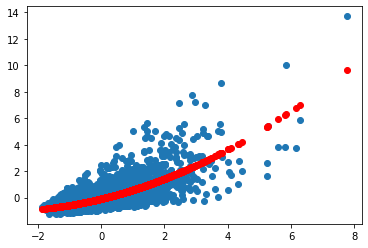

In [ ]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,c='r')

RMSE Hatasının hesaplanması

In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 0.6544804695761719


ID numarası: 1925069082 olan eve veri seti içerisnde ulaşılması

In [ ]:
a=df[df['id']==1925069082]
a

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


ID numarası 1925069082 olan evin m2 özelliği iile fiyatının tahmin edilmesi 

In [ ]:
y_new = lin_reg.predict(poly_reg.fit_transform([[4640]]))
y_new

array([[1894459.97291057]])

Gerçek fiyat değeriyle tahminlenen fiyat arasındaki fark: 305540.02708943

In [ ]:
2200000-1894459.97291057

305540.02708943

ID numarası: 5309101200 olan eve veri seti içerisnden ulaşılması

In [ ]:
b=df[df['id']==5309101200]
b

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


ID numarası 5309101200	 olan evin m2 özelliği iile fiyatının tahmin edilmesi 

In [ ]:
y_new1= lin_reg.predict(poly_reg.fit_transform([[2400]]))
y_new1

array([[507510.49807911]])

Gerçek fiyat değeriyle tahminlenen fiyat arasındaki fark: 112489.50192089

In [ ]:
620000-507510.49807911

112489.50192089

## Basit Polinomal regresyon (5.Derece)

Bu bölümde sadece m2 bilgisiyle fiyat tahmin eden bir 5. dereceden bir polinomal model oluşturdum.

Bazı önemli kütüphanelerin içe aktarılması

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Verinin okunması

In [ ]:
ds = pd.read_csv('home_data.csv')

Verideki sqft ve price kolonuna sayısal indeksle ulaşılmas

In [ ]:
X = ds.iloc[:,[5]].values
y = ds.iloc[:, [2]].values

X ve y değerlerinin standart bir aralığa çekilmesi

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std = sc_X.fit_transform(y)

Eğitim ve test verisetinin ayrılması

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X_std, y_std, test_size=0.2, random_state = 0)

Polinomal regresyon modelinin 5. dereceden olşturulması ve modelin eğitim veri setine uydurulması

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=5)
X_poly= poly_reg.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y_train)
X_pt=poly_reg.fit_transform(X_test)
y_pred=lin_reg.predict(X_pt)

Modelin çizdirilemesi

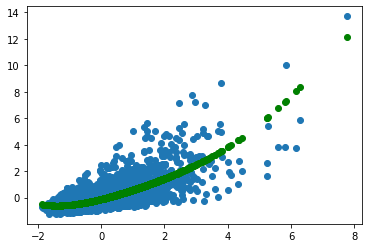

In [ ]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,c='g')

RMSE Hatasının hesaplanması

In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 0.6570396917796718


ID numarası 1925069082 olan evin veri içerisinden bulunması

In [ ]:
a=ds[ds['id']==1925069082]
a

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


ID numarası 1925069082 olan evin  5.dereceden regresyon modeli kullanarak m2 özelliği ile fiyat tahmini yapılaması 

In [ ]:
y_new = lin_reg.predict(poly_reg.fit_transform([[4640]]))
y_new

array([[-1.0401361e+15]])

Gerçek fiyat değeriyle tahminlenen fiyat arasındaki fark: 1040136102200000.0

In [ ]:
2200000-(-1.0401361e+15)

1040136102200000.0

ID numarası 5309101200 olan evin veri içersinden bulunması

In [ ]:
b=ds[ds['id']==5309101200]
b

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


ID numarası 5309101200 olan evin  5.dereceden regresyon modeli kullanarak m2 özelliği ile fiyat tahmini yapılaması 

In [ ]:
y_new1= lin_reg.predict(poly_reg.fit_transform([[2400]]))
y_new1

array([[-3.83879913e+13]])

Gerçek fiyat değeriyle tahminlenen fiyat arasındaki fark: 38387991920000.0

In [ ]:
620000-(-3.83879913e+13)

38387991920000.0

###Sonuç 

ID numaraları '5309101200' ve '1925069082' olan evlerin fiyatlarının tahminini yapan modellerimden 2. dereceden polinomal regresyon modelindeki hatanın  5. dereceden polinomal regresyon modelinden daha az olduğu, modeldeki derece artışının tahmin sonucuna negatif bir etki yaptığını ve tahmin performansını düşürdüğünü tespit ettim.

## Gelişmiş özellikler kullanan polinomal model (2. Derece)

Bu bölümde verideki bütün özellikleri kullanarak bir 2. derecden polinomal regresyon modeli oluşturacağız.

Kütüphanelerin içe aktarılması

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Verinin okunması

In [4]:
df = pd.read_csv('home_data.csv')

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

X değerleri verideki id ve date özellikleri hariç diğer özelliklerin değerlerini içerirken y değerleri ise price kolonundaki değerleri içerir

In [5]:
X = df.iloc[:,3:].values
y = df.iloc[:, [2]].values

Modeli 2. derecden olacak şekilde ayarladım ve verileri belirli bir standart aralığa çektim

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_poly_std = sc_X.fit_transform(X_poly)

Veri setini eğitim ve test olarak ayırdım

In [7]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X_poly_std, y, test_size=0.2, random_state = 0)

Olşturduğum 2. dereceden modeli eğitim veri setime uydurdum

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Modelin tahminlemesi

In [9]:
y_pred = lin_reg.predict(X_test)

RMSE Hatası

In [10]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 152399.3569169217


RMSE hatasının yorumu sonuç kısmında detaylı olarak anlatılmıştır.

## Gelişmiş özellikler kullanan polinomal model (5. Derece)

Bu bölümde verideki bütün özellikleri kullanarak bir 5. derecden polinomal regresyon modeli oluşturacağız.

Kütüphanelerin içe aktarılması

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Verinin okunması

In [2]:
df = pd.read_csv('home_data.csv')

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Verideki id ve date özellikleri hariç diğer özellikler X değerlerini price içersindeki bilgi ise y değerlerini oluşturuyor 

In [3]:
X = df.iloc[:,3:].values
y = df.iloc[:, [2]].values

Modeli 5. dereceden bir polinomal regresyon modeli oluşturmayı istedim fakat colab oturumu ram yetersizliği hatası verdiği için model derecesini 4'e düşürmek zorunda kaldım. 4. dereceden Modeli olşturdum ve verileri belirli bir standart aralığa çektim

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_poly_std = sc_X.fit_transform(X_poly)

Veriyi eğitim ve test veri kümesi olarak ayırıdm

In [5]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train ,y_test = train_test_split(X_poly_std, y, test_size=0.2, random_state = 0)

Modeli eğitim veri setine uydurdum

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model tarafından yapılan tahminleme

In [8]:
y_pred = lin_reg.predict(X_test)

RMSE hatası

In [9]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 3380612939441.9688


### Sonuç

Verisetindeki diğer özellikleri de katarak oluşturduğum 2. dereceden ve 4ç dereceden polinomal regresyon modelinde RMSE hatalarını hesapladım. 2.dereceden oluşturduğum hata diğeri 4. derecden olşturulan modele göre daha az çıktı. Bu 2. dereceden polinomal modelin kullanılması konusunda bizi motive eder.

# Kaynakça

[Lineer Regresyon nedir?](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

[Polinomal regresyon nedir?](https://www.javatpoint.com/machine-learning-polynomial-regression)